# 물체 분류(Object Classification)

영상을 미리 정의된 특정 클래스로 분류하는 작업







예를 들어 필기체 숫자 데이터인 MNIST는 0에서9까지의 10개의 클래스가 있다.



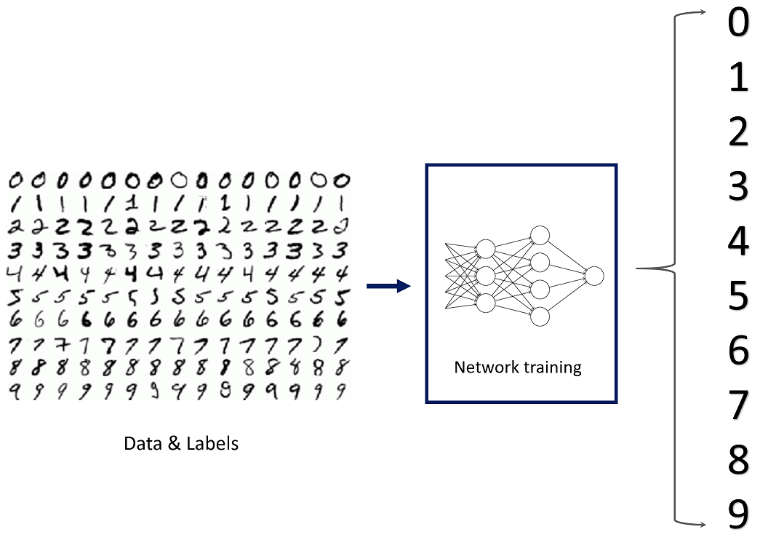


다음은 이미지를 4개의 클래스(dog, cat, bird, boat) 중의 하나로 분류하는 예이다.

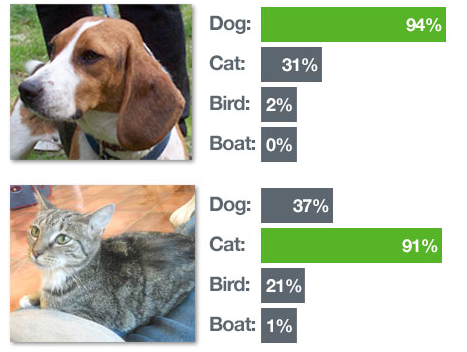

## 딥러닝을 사용한 물체 분류

기존에는 컴퓨터 비전(Computer Vision)이나 머신러닝(Machine Learning) 방법이 많이 시도되었다.

하지만 2012년 이후 딥러닝이 물체 분류에 뛰어난 결과를 보이고 있다.

딥러닝을 사용하여 물체 분류를 하기 위해서는 레이블링(labeling) 데이터가 필요하다.

# ImageNet

일반적인 사물 사진의 데이터.

1400만개의 이미지.




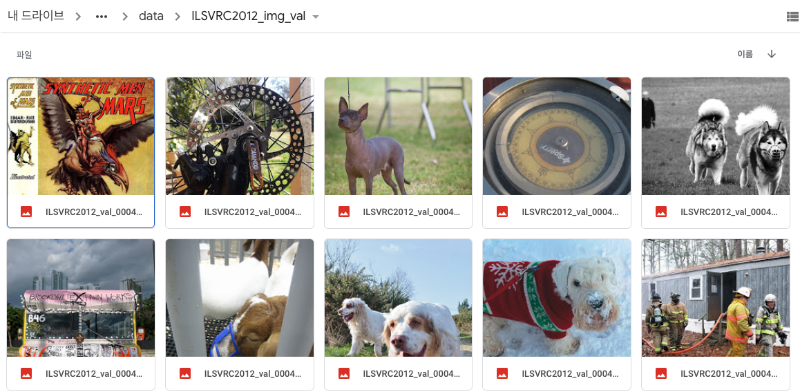

1000개의 클래스를 갖는다.

각 클래스는 다음 url에서 확인 가능하다.

https://gist.github.com/aaronpolhamus/964a4411c0906315deb9f4a3723aac57

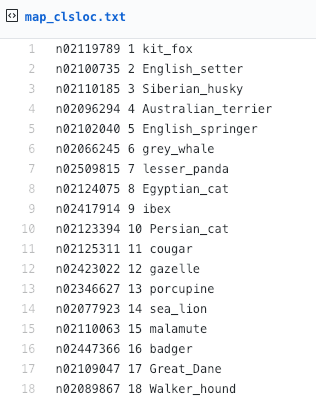

## ILSVRC 대회

ILSVRC(ImageNet Large Scale Visual Recognition Competition)

ImageNet을 대상으로 물체 분류와 기타 작업의 성능을 겨루는 대회.




분류 분야의 경우 사람의 능력을 앞서는 이유로, 2017년에 분류 분야는 폐지되었다.


## 우승 모델들

대부분 CNN을 기반으로 한다.

특히 2012년 AlexNet의 결과로 인해 딥러닝이 관심을 받게되었고, AI의 겨울이 끝났다.

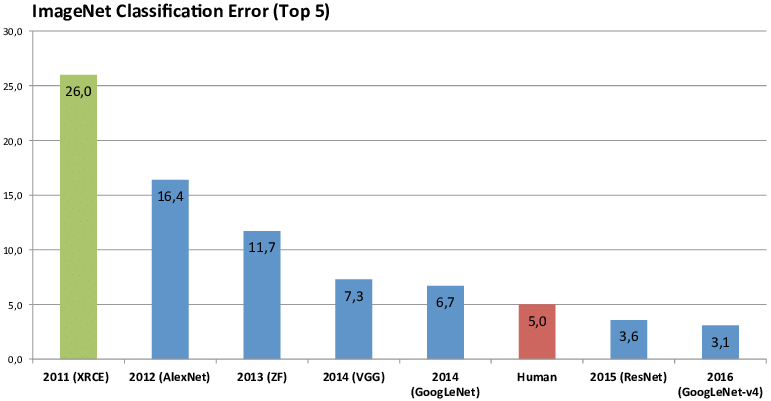

## 모델 공개
ILSVRC의 우승한 모델들은 그 구조가 공개되어 있고, 또 일부는 학습된 모델 자체가  공개되어 있다.

성능이 이미 사람 보다 앞서 기 때문에, 분류 작업을 위해서는 공개되어 있는 모델을 가져다 사용하면 된다.

Keras의 경우 프레임웤 자체에 그 모델들이 포함되어 있다.

## Keras Application

Keras에는 대표적인 분류 모델 들이 자체 제공되고 있다.

https://keras.io/applications/


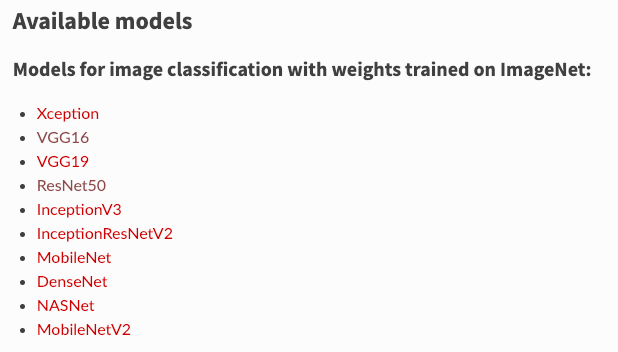

# 커스텀 데이타 분류

공개된 딥러닝 모델들은 훌륭한 성능을 보인다.

하지만 그 분류 대상은 학습에 사용된 ImageNet의 1000개의 클래스를 대상으로 한다.

만약 실무에서 분류하고 싶은 클래스가 1000개와 다르다면 문제가 된다.



다음과 같이 4개의 클래스로 학습이 된 모델인데, 4개에 속하지 않는 말 이미지라면?



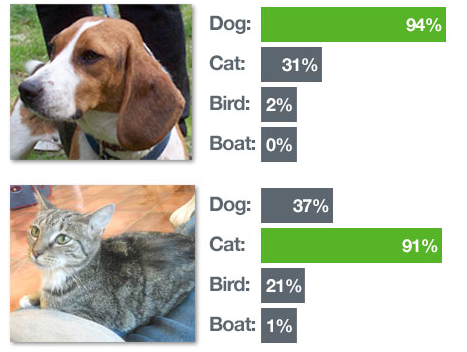

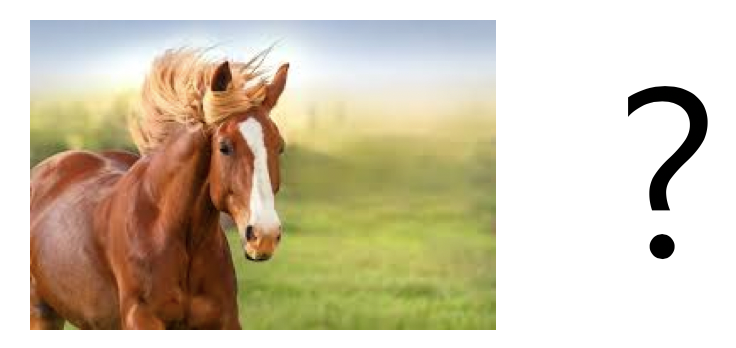

말이라는 클래스를 하나 추가하고, 말의 이미지를 가지고 다시 학습시켜야 한다.

이 경우 클래스의 갯수는 기존 4개에 1개를 추가하여 5개가 된다.

## 전이 학습(Transfer Learning)

공개된 모델의 구조를 그대로 사용할 수 있다. 

데이터만 충분하다면 훌륭한 성능을 기대할 수 있다.




하지만 현실에서는 충분한 데이터를 확보하기가 어렵다.

이 경우 맨 처음 부터 학습을 실행시키는 것이 아니라, 학습되어 있는 모델을 가져오고 이 상태에서 학습을 진행 시킨다.




이 때 conv 레이어와 max pooling 레이어는 학습이 진행되지 않도록 고정시키고, fully connected 레이어만 대상 클래스의 갯수에 따로 수정하고 학습을 진행한다.

아래 예는 VGG16 모델을 가져왔고, 원래 1000개의 클래스였던 것을 101개의 클래스의 목적에 맞게 fully connected 레이어를 수정한 경우이다.

**가져온 모델**

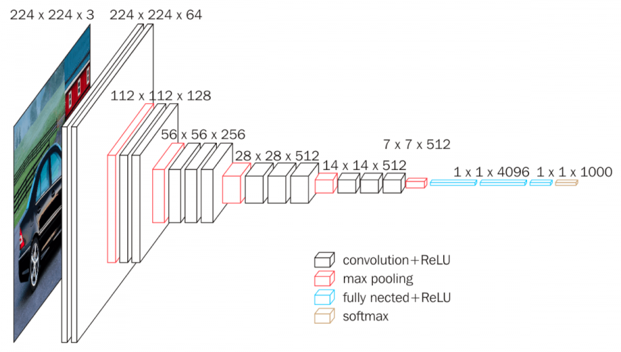

**모델 구조 변경**

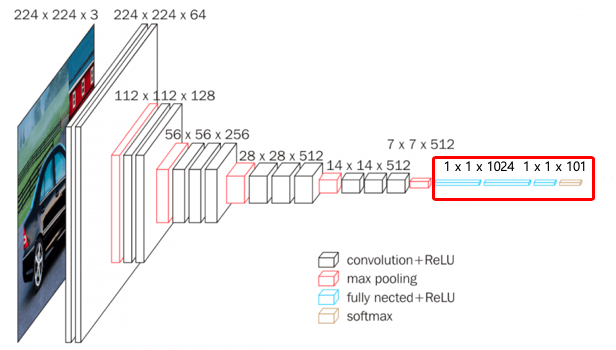

**conv 레이어 고정**

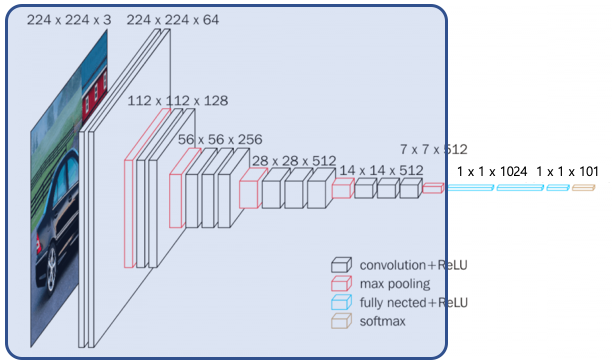

## 전이학습 의미

fully connected 레이어로의 입력 노드 수는 4,096개이다. 입력 노드의 수 150,528 대비 2.7%이다.

conv 레이어와 max pooling 레이어는 입력 영상을 분류하기 위한 소수의 정보를 추출 역할을 한 것으로 볼 수 있다. 분류를 위한 특질 추출(feature extraction)기로 볼 수 있다.


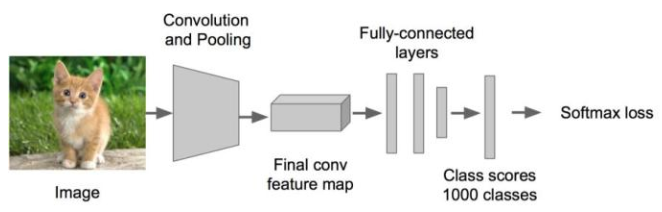


그런데 VGG16의 경우 성능이 뛰어나다는 것을 보면 그 특질 추출의 성능 역시 뛰어난다고 볼 수 있다. 

대회에서 우승한 뛰어난 모델의 특질 추출 부분을 그대로 사용하고, 그 특질 추출한 값으로 fully connected 레이어만 학습하여 커스텀 데이터에 대한 분류를 하려는 방법이다. 

# 실습 준비

## Google Driver와 Colab 연동

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 실행위치 이동

In [ ]:
# 현재 위치
!pwd

# 실행 위치 이동
%cd "/content/gdrive/My Drive/edu/kma_200812/01_object_classfication"

# 이동된 위치 확인
!pwd
!ls -al


/content
[Errno 2] No such file or directory: '/content/gdrive/My Drive/edu/kma_200812/01_object_classfication'
/content
/content
total 20
drwxr-xr-x 1 root root 4096 May 12 01:54 .
drwxr-xr-x 1 root root 4096 May 12 01:41 ..
drwxr-xr-x 4 root root 4096 May  6 13:43 .config
drwx------ 5 root root 4096 May 12 01:54 gdrive
drwxr-xr-x 1 root root 4096 May  6 13:44 sample_data


#VGG16으로 ImageNet 분류

##  VGG16

2014년 ImageNet 대상으로 물체분류 대회 ILSVRC에서 우승한 모델

convolution 레이어와 max pooling 레이어가 있는 CNN이다.

21개의 레이어를 갖는다. 학습 대상인 weight의 갯수는 약 1억 4천만개이다.

모델 파일의 크기는 약 500M



입력은 이미지의 크기 224 x 224에 RGB 3개의 값이 있는 3차원 데이터이다.

ImageNet을 대상으로 하기에 출력은 1000개의 클래스에 해당하는 1000개 값을 갖는다.

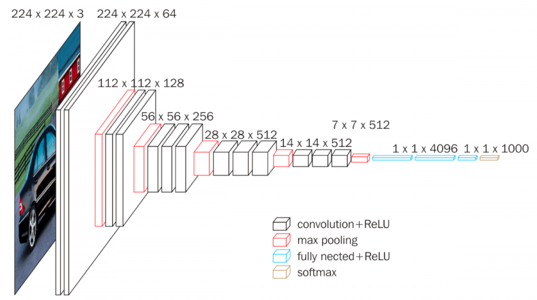

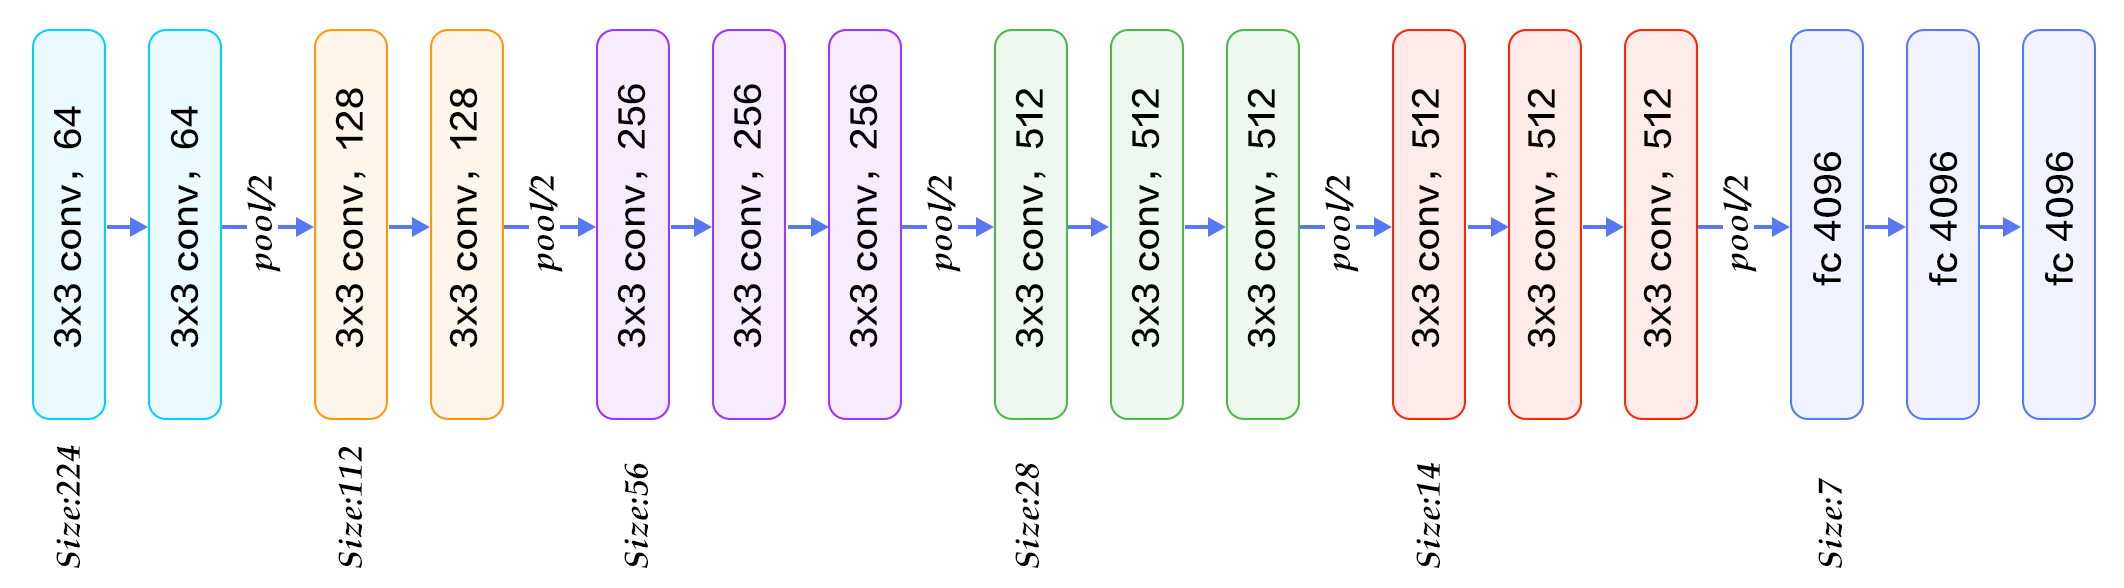

## ImageNet 데이터 다운로드
이미 학습된 VGG16 모델의 학습 데이터인 Imagenet validation 데이터를 다운로드

용량이 6G로 크기 때문에 2%(150M)에서 다운로드를 중단한다.
### 현재는 링크가 막혀 기존 데이터로 대체

In [ ]:
# 만약 기존 것이 있다면 삭제
#!rm -rf data/ILSVRC2012_img_val.tar*

# data 폴더 밑에 다운로드
#!wget http://www.image-net.org/challenges/LSVRC/2012/nnoupb/ILSVRC2012_img_val.tar -P data
 
# 다운로드 확인
!ls -al data

ls: cannot access 'data': No such file or directory


In [ ]:
!ls -al data

ls: cannot access 'data': No such file or directory


## 압축 풀기
다운로드 받은 ILSVRC2012_img_val.tar 파일을 data/ILSVRC2012_img_val 폴더 밑에 압축을 푼다.

In [ ]:
# 만약 기존 것이 있다면 삭제
!rm -rf data/ILSVRC2012_img_val

# 디렉토리 색성
!mkdir -p data/ILSVRC2012_img_val

# 압축 풀기
!tar xf data/ILSVRC2012_img_val.tar -C data/ILSVRC2012_img_val

# 압축 푼 것 확인
!echo; echo ls data/ILSVRC2012_img_val
# 파일 10개만
!ls data/ILSVRC2012_img_val | head -10
# 전체 파일 갯수
!ls data/ILSVRC2012_img_val | wc -l


tar: data/ILSVRC2012_img_val.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now

ls data/ILSVRC2012_img_val
0


##분류 실행
미리 학습된 VGG16 모델을 사용하여 ImageNet 데이터를 대상으로 분류한다.

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display # 이미지 출력 함수
import numpy as np




def predict_vgg16(model, filename) :

  # 이미지 파일을 읽고 화면에 표시
  image = load_img(filename)
  # image = PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=688x550
  display(image)
  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 가로
  # 세번째 224 : 세로
  # 네번째 3 : R, G, B 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
  if model.name == 'vgg16' :
    
    
    # 모델 적용된 결과를 파싱
    label = vgg16.decode_predictions(yhat)
    # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

    # 가장 확률이 높은 결과를 획득
    label = label[0][0]
    # label = ('n02655020', 'puffer', 0.9612253)

    # 라벨과 라벨을 예측한 확률을 출력
    print('%s (%.2f%%)' % (label[1], label[2]*100))    

  else :

    # 최대 출력 인댁스를 구한다.
    idx=np.argmax(yhat[0])

    # 커스텀 레이블을 출력한다.
    print('%s (%.2f%%)' % (custom_labels[idx], yhat[0][idx]*100))
    
    
    
    


In [ ]:
# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

files = ('data/ILSVRC2012_img_val/ILSVRC2012_val_00000079.JPEG'
        ,'data/ILSVRC2012_img_val/ILSVRC2012_val_00000124.JPEG'
        ,'data/ILSVRC2012_img_val/ILSVRC2012_val_00000441.JPEG')

for file in files :
  predict_vgg16(model, file)  

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

FileNotFoundError: ignored

# ResNet으로 ImageNet 분류

## ResNet


2015년 ImageNet 대상으로 물체분류 대회 ILSVRC에서 우승한 모델

convolution 레이어와 max pooling 레이어가 있는 CNN이며, 특정 레이어와 2개 이후 레이 간의 연결이 있다


많은 레이어를 갖는다. 학습 대상인 weight의 갯수는 약 2500만개이다.

모델 파일의 크기는 약 100M.

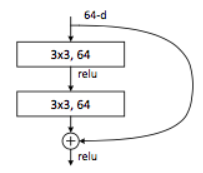

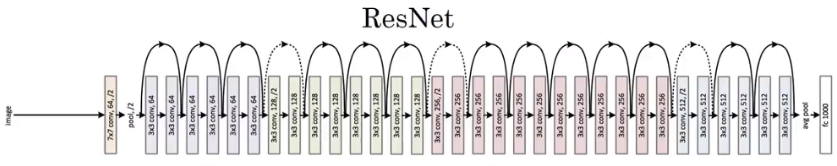


입력과 출력은 VGG16과 동일하다.

입력은 이미지의 크기 224 x 224에 RGB 3개의 값이 있는 3차원 데이터이다.

ImageNet을 대상으로 하기에 출력은 1000개의 클래스에 해당하는 1000개 값을 갖는다.


## 실행 코드

앞의 predict_vgg16()과 전체 구조는 완벽히 동일하다.

비교를 위해 커멘트를 전부 삭제하였고, 다른 부분만 커멘트를 달았다.

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.applications import vgg16
from keras.applications import resnet50
from IPython.display import display
import numpy as np


def predict_resnet50(model, filename) :

  image = load_img(filename)
  display(image)
  
  image = load_img(filename, target_size=(224, 224))

  
  image = img_to_array(image)

  image = image.reshape((1, 224, 224, 3))

#  image = vgg16.preprocess_input(image)
  image = resnet50.preprocess_input(image)
  
  
  yhat = model.predict(image)
    
    
#  label = vgg16.decode_predictions(yhat)
  label = resnet50.decode_predictions(yhat)

  label = label[0][0]
  
  print('%s (%.2f%%)' % (label[1], label[2]*100))
  

  


## 분류 실행

실행 방법도 앞의 VGG16과 동일하다.

In [ ]:
# RestNet50 모델 불러오기
#model = vgg16.VGG16()
model = resnet50.ResNet50()

model.summary()

files = ('data/ILSVRC2012_img_val/ILSVRC2012_val_00000079.JPEG'
        ,'data/ILSVRC2012_img_val/ILSVRC2012_val_00000124.JPEG'
        ,'data/ILSVRC2012_img_val/ILSVRC2012_val_00000441.JPEG')

for file in files :
#  predict_vgg16(model, file)  
  predict_resnet50(model, file)    

# 커스텀 데이터 분류

Calteck 101 Object Categories 데이터를 사용한다.

101개의 클래스가 있다.

## 커스텀 데이터 다운로드


In [ ]:
!pwd

In [ ]:
# 만약 기존 것이 있다면 삭제
#!rm -rf data/101_ObjectCategories.tar.gz*

# 다운로드
#!wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz -P data

# 다운 받은 파일 확인
!ls -al data

## 압축 풀기
다운로드 받은  data/101_ObjectCategories.tar.gz 파일을 data 폴더 밑에 압축을 푼다.

풀고 나면 data/101_ObjectCategories 폴더가 생기고, 이 폴더 밑에 101개의 폴더가 있다.
각 폴더는 각 클래스에 해당한다.


101개의 각 폴더 안에는 50개정도의 이미지 파일이 있다.

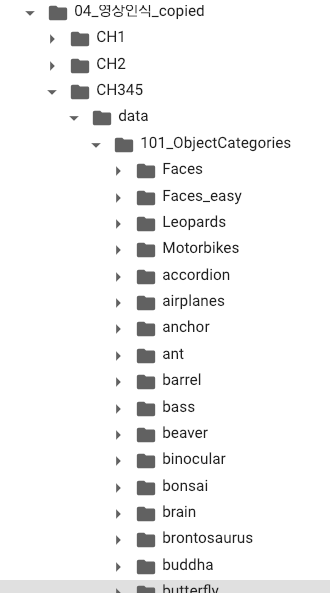

In [ ]:
# 만약 기존 것이 있다면 삭제
#!rm -rf data/101_ObjectCategories

# 압축을 풀고
!tar xfz data/101_ObjectCategories.tar.gz --exclude "*BACKGROUND*" -C data

# data 디렉토리 내용 확인
!echo; echo ls data
!ls -al data

# data/101_ObjectCategories 디렉토리 내용 확인
!echo; echo ls data/101_ObjectCategories
!ls data/101_ObjectCategories

# 압축 푼 파일 중 디렉토리 camera 내용 확인
!echo; echo ls data/101_ObjectCategories/camera
!ls data/101_ObjectCategories/camera

## train, validation 데이터 준비
data/101_ObjectCategories 밑의 모든 폴더를 data/101_ObjectCategories/train으로 이동

train 데이터의 20%를 data/101_ObjectCategories/validation으로 이동


결과적으로 data폴더 밑에 train, validation 폴더로 전체 데이터를 나누었다.

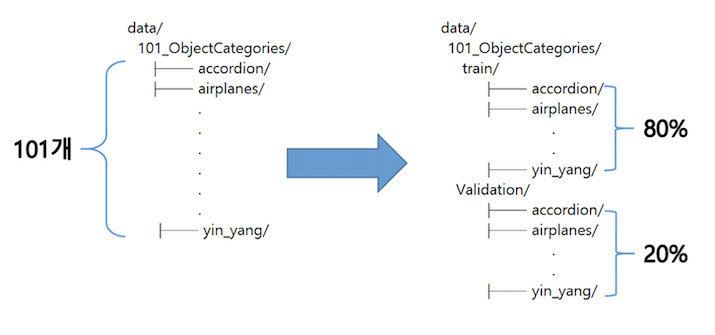

In [ ]:
!rm -rf data/101_ObjectCategories/train
!rm -rf data/101_ObjectCategories/validation

# data/101_ObjectCategories을 통채로 data/101_ObjectCategories/train으로 카피
!mv data/101_ObjectCategories data/tmp
!mkdir -p data/101_ObjectCategories
!mv data/tmp data/101_ObjectCategories/train

# 내용 확인
!echo; echo ls data/101_ObjectCategories/train
!ls data/101_ObjectCategories/train
!echo; echo ls data/101_ObjectCategories/train/camera
!ls data/101_ObjectCategories/train/camera

# data/101_ObjectCategories/train의 파일 20%를 data./101_ObjectCategories/valiation으로 카피
!echo will move 20% of train into validation
!rm -rf data/101_ObjectCategories/validation
!mkdir data/101_ObjectCategories/validation

!for idx in $(ls -d data/101_ObjectCategories/train/*); do \
  P3=data/101_ObjectCategories/validation/`basename $idx`; \
  mkdir -p $P3; \
  FCNT=$(($(ls "$idx"|wc -l) * 20 / 100)); \
  for jdx in $(ls $idx/* | head -$FCNT); do \
    mv "$jdx" $P3 ; \
  done; \
done; \

# 내용 확인
!echo; echo ls data/101_ObjectCategories/validation
!ls data/101_ObjectCategories/validation
!echo; echo ls data/101_ObjectCategories/train/camera
!ls data/101_ObjectCategories/train/camera
!echo; echo ls data/101_ObjectCategories/validation/camera
!ls data/101_ObjectCategories/validation/camera

## 레이블링 데이타

별도로 레이블링 데이타를 작성하지 않는다.

이미지 파일이 들어있는 디렉토리 이름이 레이블링으로 사용된다.

본 예의 경우 101개의 디렉토리가 있고, 이것이 101개의 클래스가 되며, 디렉토리 이름이 각 클래스의 이름이 된다.

## 분류 실행
커스텀 데이터를 대상으로 예측한다.

In [ ]:
from keras.applications import vgg16

# VGG16 모델을 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()
  

files = ('data/101_ObjectCategories/validation/lamp/image_0001.jpg'
        ,'data/101_ObjectCategories/validation/cup/image_0002.jpg'
        ,'data/101_ObjectCategories/validation/panda/image_0003.jpg')

  
for file in files :
  predict_vgg16(model, file)   


# 전이 학습
이미 학습되어 있는 VGG16으로 새로운 데이터를 학습한다.

다운로드 한 101 카테고리의 데이터에 대하여 학습한다.

모델은 convolution layer는 이미 학습된 것으로 고정하고.
모델의 Fully Connected부분을 재구성하고 이 부분만 학습한다.



## ImageDataGenerator
Keras에서 제공하는 ImageDataGenerator를 사용한다.

적은 수의 데이터를 커버하기 위하여 데이터 증강을 한다.

- 회전 각도 : 20
- 좌우 이동 : 0.2
- 상하 이동 : 0.2
- 좌우 반전 : True

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'data/101_ObjectCategories/train'
validation_dir = 'data/101_ObjectCategories/validation'
batch_size = 50
image_size = 224

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
      rescale=1./255, # 0~255를 0~1로 값 변환
      rotation_range=20, # 회전 쵀대 20도
      width_shift_range=0.2, # 좌우 이동
      height_shift_range=0.2, # 상하 이동
      horizontal_flip=True, # 좌우 반전
      fill_mode='nearest')
 
# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator(rescale=1./255)
 

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_num=len(train_generator.class_indices)

custom_labels = list(validation_generator.class_indices.keys())

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display
import numpy as np




def predict_custom_vgg16(model, filename) :

  image = load_img(filename)
  display(image)
  
  image = load_img(filename, target_size=(224, 224))

  image = img_to_array(image)
  image = image.reshape((1, 224, 224, 3))

  image = vgg16.preprocess_input(image)
  
  
  yhat = model.predict(image)
    


  # 최대 출력 인덱스를 구한다.
  idx=np.argmax(yhat[0])

  # 커스텀 레이블을 출력한다.
  print('%s (%.2f%%)' % (custom_labels[idx], yhat[0][idx]*100))
    
    
    
    


## 모델 정의
이미 학습된 VGG16의 conv 레이어는 그대로 두고
Fully Connected 레이어 부분만 새로 정의한다.

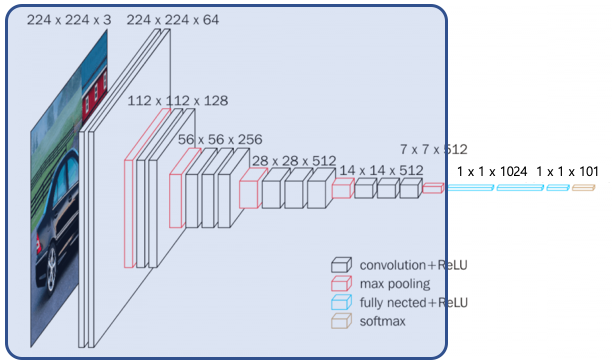

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

from keras.applications import VGG16
# VGG16 모델 불러오기
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
vgg_conv.summary()

# VGG16 모델의 Convolution Layer를 학습되지 않도록 고정 
for layer in vgg_conv.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(vgg_conv)
 
# 모델의 Fully Connected 부분만 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))

# 모델 요약, 학습가능한 파라미터 갯수를 확인
model.summary()

## 모델 학습
학습한 모델을 저장할 model 폴더 생성

In [ ]:
# 기존 모델 삭제
!rm -rf model

# 모델 저장 디렉토리 생성
!mkdir model

In [ ]:
!rm -rf model/small_last4.h5
# 모델 학습 설계
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# 모델 학습
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# 모델 저장
model.save('model/small_last4.h5')

## 학습 확인
 accuracy와 loss의 그래프를 확인

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.title('Training and validation accuracy')
plt.legend()
  
plt.show()

## 분류 실행
학습된 모델 파일을 읽어서 분류를 실행한다.


In [ ]:
from keras.models import load_model

model_path = 'model/small_last4.h5'

model = load_model(model_path)

# 모델의 모양을 보여준다.
model.summary()
  

files = ('data/101_ObjectCategories/validation/lamp/image_0001.jpg'
        ,'data/101_ObjectCategories/validation/cup/image_0002.jpg'
        ,'data/101_ObjectCategories/validation/panda/image_0003.jpg')

  
for file in files :
  predict_custom_vgg16(model, file)     
  

# 전이 학습 (2)
앞에서 전이 학습한 모델에서 conv 레이어도 학습하도록 한다.


## 모델 정의
앞의 전의 학습과 모델 구조는 동일하다.

다만 conv 레이어와 max pooling 레이어도 학습 가능하도록 하였다.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

K.clear_session()

from keras.applications import VGG16
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
vgg_conv.summary()

for layer in vgg_conv.layers:
    layer.trainable = True # 이부분만 다르다. conv 레이어도 학습되도록 설정


model = models.Sequential()

model.add(vgg_conv)
 
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))

# 바로 앞에서 학습한 모델을 읽어서 시작한다.
model.load_weights('model/small_last4.h5')


model.summary()

## 모델 학습

In [ ]:
!rm -rf model/small_last5.h5

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('model/small_last5.h5')

## 학습 확인
 accuracy와 loss의 그래프를 확인

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.title('Training and validation accuracy')
plt.legend()
  
plt.show()

## 분류 실행
학습된 모델 파일을 읽어서 분류를 실행한다.


In [ ]:
from keras.models import load_model

model_path = 'model/small_last5.h5'

model = load_model(model_path)

# 모델의 모양을 보여준다.
model.summary()
  

files = ('data/101_ObjectCategories/validation/lamp/image_0001.jpg'
        ,'data/101_ObjectCategories/validation/cup/image_0002.jpg'
        ,'data/101_ObjectCategories/validation/panda/image_0003.jpg')

  
for file in files :
  predict_custom_vgg16(model, file)      
  

# 전체 비교

다음 3가지에 모델로 커스텀 데이터에 대하여 분류 실행하여 비교한다.

* 제공된 VGG16
* Dense Layer만 학습된 모델
* 전체 학습된 모델



In [ ]:
from keras.models import load_model

  

files = ('data/101_ObjectCategories/validation/lamp/image_0001.jpg'
        ,'data/101_ObjectCategories/validation/cup/image_0002.jpg'
        ,'data/101_ObjectCategories/validation/panda/image_0003.jpg')

def predict_with_model(model):

  for file in files :
    predict_vgg16(model, file)    

    
    

predict_with_model(vgg16.VGG16())
predict_with_model(load_model('model/small_last4.h5'))
predict_with_model(load_model('model/small_last5.h5'))
  


# 참고자료
- Code
 - http://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb
 - https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

- Keras document
 - https://keras.io/applications/
 
- Fine tune
 - https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/
 - https://gist.github.com/fchollet/7eb39b44eb9e16e59632d25fb3119975